# Prepare Data For Modelling

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

DATA_DIR = Path('../data')

%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

In [2]:
# Utility functions
# TODO: move into util file

def greek_text_to_symbol(text):
    greek_text_to_symbol_dict={
        "alpha1": 'α1',
        "alpha2": 'α2',
        "alpha3": 'α3',
        "alpha'1": "α'1",
        "alpha'2": "α'2", 
        "alpha'3": "α'3",
        "beta1": 'β1',
        "beta2": 'β2',
        "beta'1": "β'1",
        "beta'2": "β'2",
        "gamma1": 'γ1',
        "gamma2": 'γ2',
        "gamma3": 'γ3',
        "gamma4": 'γ4',
        "gamma5": 'γ5'
    }
    return greek_text_to_symbol_dict[text]

def greek_symbol_to_text(symbol):
    greek_symbol_to_text_dict={
        'α1': "alpha1",
        'α2': "alpha2",
        'α3': "alpha3",
        "α'1": "alpha'1",
        "α'2": "alpha'2", 
        "α'3": "alpha'3",
        'β1': "beta1",
        'β2': "beta2",
        "β'1":"beta'1",
        "β'2": "beta'2",
        'γ1': "gamma1",
        'γ2': "gamma2",
        'γ3': "gamma3",
        'γ4': "gamma4",
        'γ5': "gamma5"
    }
    return greek_symbol_to_text_dict[symbol]



## Load Datasets

In [3]:
df_hije = pd.read_pickle(DATA_DIR / 'hije-cleaned.pkl')
df_hije.head()

,stimulus,MBON dF/F,lobe
0,2-heptanone,36.507974,alpha'1
1,citronella,7.746457,alpha'1
2,ethanol,26.400560,alpha'1
3,hexanol,25.634449,alpha'1
4,mch,18.801127,alpha'1


In [4]:
df_siju = pd.read_pickle(DATA_DIR / 'siju-cleaned.pkl')
df_siju.head()

,stimulus,lobe,DAN dF/F
0,1-Hexanol,α'1,0.432535
1,1-Hexanol,α'2,0.060010
2,1-Hexanol,α'3,1.047047
3,1-Hexanol,α1,0.237846
4,1-Hexanol,α2,0.150805


## Create similarly formatted pivot tables

### Siju

In [5]:
# Create the pivot table
df_siju_pivot = df_siju.pivot(index='lobe', columns='stimulus', values='DAN dF/F')

# Simplify the column names
new_col_names = [re.sub('[^A-Za-z]+', '', col.lower()) for col in list(df_siju_pivot.columns)]
df_siju_pivot.columns = new_col_names

# Sort by col name
df_siju_pivot = df_siju_pivot.reindex(sorted(df_siju_pivot.columns), axis=1)

df_siju_pivot

,citronella,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
lobe,,,,,,,,,
α'1,0.401772,0.266068,0.707905,0.432535,0.356862,0.666120,0.626170,0.258776,0.264226
α'2,0.302586,0.354579,0.374887,0.060010,0.151816,0.847306,0.374586,0.286377,0.334410
α'3,0.494694,1.078572,0.592451,1.047047,0.155385,0.695588,1.310789,0.466881,0.853957
α1,0.079098,0.142929,0.123494,0.237846,0.129009,0.174596,0.115439,0.058942,0.083482
α2,0.296229,0.436901,0.393083,0.150805,0.099058,0.832962,0.364048,0.238490,0.265717
α3,0.464134,0.366798,0.524156,0.419109,0.319531,0.811552,0.624012,0.136024,0.266320
β'1,0.477804,1.248524,0.799185,1.424355,0.847162,1.092823,1.522583,0.653043,0.942675
β'2,0.534653,0.460108,0.413575,1.063830,0.835854,0.583576,0.662444,0.802949,0.798485
β1,0.206465,0.309908,0.150469,0.601346,0.588942,0.290707,0.516571,0.567835,0.477898


### Hije

In [6]:
# Convert text lobe labels to greek letters
df_hije['lobe'] = df_hije['lobe'].apply(greek_text_to_symbol)

In [7]:
# Create the pivot table
df_hije_pivot = df_hije.pivot(index='lobe', columns='stimulus', values='MBON dF/F')

# Simplify the column names
new_col_names = [re.sub('[^A-Za-z]+', '', col.lower()) for col in list(df_hije_pivot.columns)]
df_hije_pivot.columns = new_col_names

# Sort by col name
df_hije_pivot = df_hije_pivot.reindex(sorted(df_hije_pivot.columns), axis=1)

df_hije_pivot

,citronella,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
lobe,,,,,,,,,
α'1,7.746457,26.400560,36.507974,25.634449,18.801127,22.986337,28.243987,49.735974,46.278667
α'2,16.205035,25.903130,56.757224,60.258264,40.968825,44.895844,55.030486,67.893369,65.921205
α'3,6.235885,11.196726,16.527422,12.791175,14.518355,11.418638,15.331365,19.891953,17.172300
α1,6.950629,18.995279,25.195775,21.534141,14.516087,15.786560,11.604648,18.224721,15.204187
α2,5.896193,13.796766,26.507974,22.699176,11.506731,16.139411,8.603303,22.061204,20.095421
α3,13.491148,28.444735,43.613813,41.823227,25.758879,28.709373,34.608653,50.353550,53.794965
β'1,13.309645,22.366436,28.493907,23.573829,19.873949,25.829289,26.803189,51.774152,48.689068
β'2,6.603429,10.291975,15.083343,14.180836,11.538718,11.540489,11.423735,15.869236,15.122547
β1,8.588297,18.581403,33.091999,30.181439,17.944532,22.546595,20.709696,35.949324,24.086183


### Examine Pivot Tables

In [8]:
df_siju_pivot.describe()

,citronella,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.351096,0.470687,0.500325,0.695246,0.500669,0.596466,0.664762,0.466514,0.502863
std,0.143965,0.321028,0.295045,0.448101,0.312279,0.277461,0.394559,0.287489,0.274507
min,0.079098,0.068536,0.123494,0.060010,0.099058,0.111695,0.115439,0.058942,0.083482
25%,0.251347,0.287988,0.325515,0.355899,0.237458,0.415224,0.411311,0.248633,0.280439
50%,0.369378,0.389681,0.434707,0.601346,0.397292,0.666120,0.624012,0.389028,0.355500
75%,0.473882,0.506751,0.607350,1.055438,0.841508,0.822257,0.760515,0.726099,0.762922
max,0.534653,1.248524,1.294430,1.424355,0.960131,1.092823,1.522583,0.912050,0.942675


In [9]:
df_hije_pivot.describe()

,citronella,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,9.482438,19.257142,31.026893,27.788436,19.969396,22.481161,22.971069,36.799595,33.034071
std,5.477775,7.703001,14.496648,14.983370,9.951227,12.809173,13.339559,18.206940,17.791216
min,-2.314361,3.787411,3.114979,0.009922,0.867203,-0.627063,3.140346,9.060922,7.768698
25%,6.419657,13.086702,20.861599,18.510629,14.345742,14.842822,11.964693,20.976578,18.633861
50%,8.588297,19.149789,33.091999,25.634449,18.801127,22.274917,22.013689,35.949324,24.086183
75%,13.400397,25.694109,40.060893,37.997204,26.528726,27.269331,30.805062,51.063851,47.483868
max,19.665794,30.952896,56.757224,60.258264,40.968825,44.895844,55.030486,67.893369,65.921205


## Normalise the datasets

In [10]:
def normalise_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    if df.min().min() < 0:
        # if there is a negative value
        df_min = df.min().min()
        df_max = df.max().max()
        
        return (df - df_min) / (df_max - df_min)
    
    # if there is no negative value     
    return df / df.max().max()
    

<AxesSubplot:title={'center':'Siju DAN Activity'}, ylabel='lobe'>

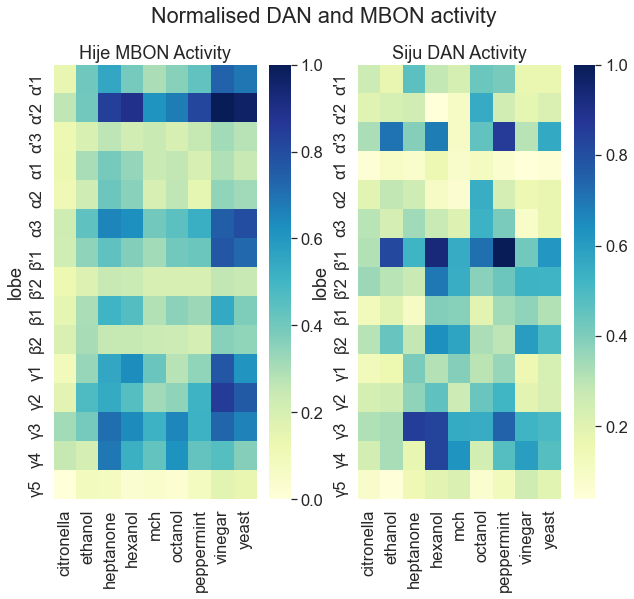

In [11]:
df_hije_pivot = normalise_dataframe(df_hije_pivot)
df_siju_pivot = normalise_dataframe(df_siju_pivot)

fig, axes = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle('Normalised DAN and MBON activity')

axes[0].set_title('Hije MBON Activity')
sns.heatmap(df_hije_pivot, ax=axes[0], cmap="YlGnBu", xticklabels=True, yticklabels=True)

axes[1].set_title('Siju DAN Activity')
sns.heatmap(df_siju_pivot, ax=axes[1], cmap="YlGnBu", xticklabels=True, yticklabels=True)

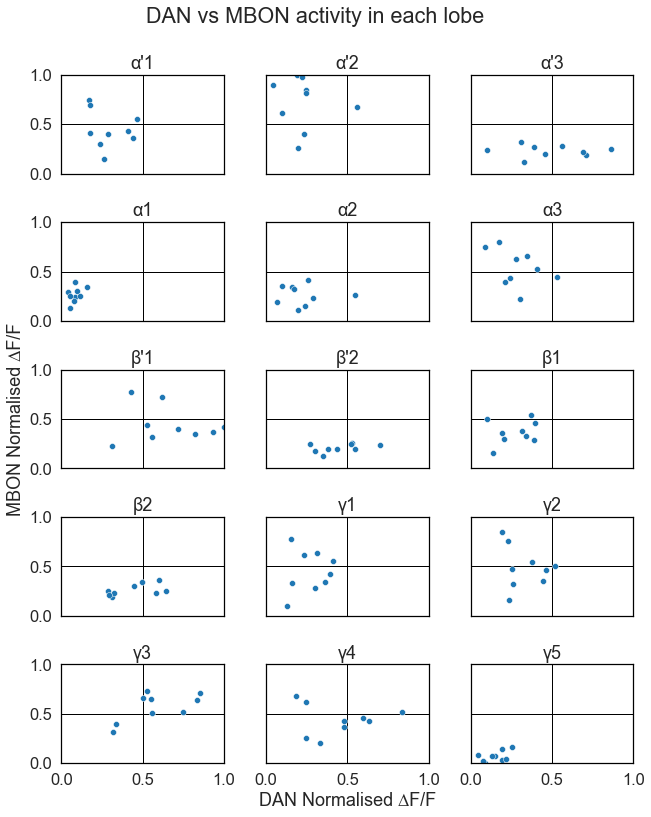

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
fig.suptitle('DAN vs MBON activity in each lobe')

for i, lobe in enumerate(df_siju_pivot.index):
    ax = axes[int(i/3), i%3]
    ax.set_title(lobe)
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    
    sns.scatterplot(
        x = list(df_siju_pivot.loc[lobe]),
        y = list(df_hije_pivot.loc[lobe]),
        ax=ax
    )

# Add common axis labels
fig.add_subplot(111, frameon=False)  
plt.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('DAN Normalised ∆F/F')
plt.ylabel('MBON Normalised ∆F/F')
    
plt.tight_layout()

# Linear Regression

## Linear model - no cross talk - no bias
Use a simple hand-made linear regression algo to draw a line of best fit (passing through the origin).

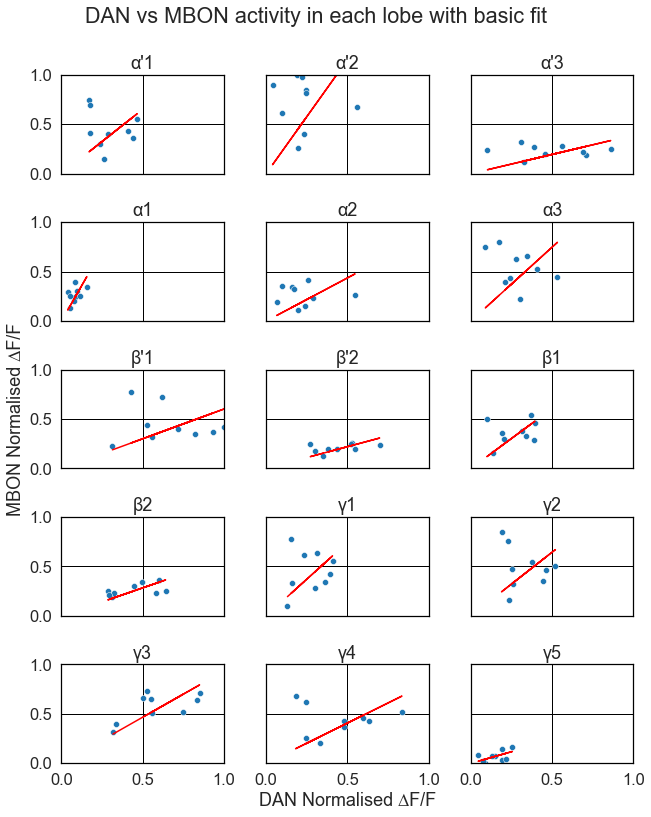

In [60]:
fitting_parameters = {}

fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
fig.suptitle('DAN vs MBON activity in each lobe with basic fit')

for i, lobe in enumerate(df_siju_pivot.index):
    ax = axes[int(i/3), i%3]
    ax.set_title(lobe)
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    
    x = np.array(df_siju_pivot.loc[lobe])
    y = np.array(df_hije_pivot.loc[lobe])
    a = (y @ x) / (x @ x)
    
    fitting_parameters[lobe] = a
    
    ax.plot(x, a*x, 'r')
    sns.scatterplot(
        x = x,
        y = y,
        ax=ax
    )

# Add common axis labels
fig.add_subplot(111, frameon=False)  
plt.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('DAN Normalised ∆F/F')
plt.ylabel('MBON Normalised ∆F/F')
    
plt.tight_layout()


In [63]:
for lobe, weight in fitting_parameters.items():
    print(f"{lobe}: w={weight:.2f}")

α'1: w=1.30
α'2: w=2.30
α'3: w=0.39
α1: w=2.88
α2: w=0.87
α3: w=1.49
β'1: w=0.60
β'2: w=0.44
β1: w=1.21
β2: w=0.57
γ1: w=1.48
γ2: w=1.29
γ3: w=0.93
γ4: w=0.81
γ5: w=0.47


## Linear model - no cross talk - with bias

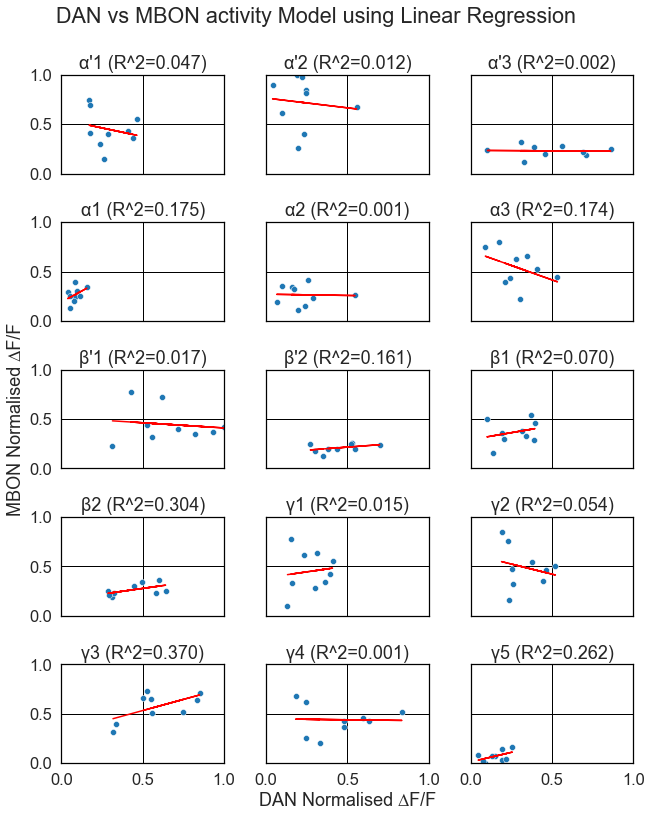

In [46]:
model_parameters = {}


fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
fig.suptitle('DAN vs MBON activity Model using Linear Regression')

for i, lobe in enumerate(df_siju_pivot.index):
    
    x = np.array(df_siju_pivot.loc[lobe])
    y = np.array(df_hije_pivot.loc[lobe])
    
    xT = x.reshape((-1,1))
    model = LinearRegression(fit_intercept=True).fit(xT, y)
    score = model.score(xT, y)
    
    model_parameters[lobe] = {
        'm': model.coef_,
        'c': model.intercept_,
        'r2': score
    }
    
    ax = axes[int(i/3), i%3]
    ax.set_title(f'{lobe} (R^2={score:.3f})')
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    
    ax.plot(xT, model.predict(xT), 'r')
    sns.scatterplot(
        x = x,
        y = y,
        ax=ax
    )

# Add common axis labels
fig.add_subplot(111, frameon=False)  
plt.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('DAN Normalised ∆F/F')
plt.ylabel('MBON Normalised ∆F/F')
    
plt.tight_layout()

In [58]:
for lobe, params in model_parameters.items():
    print(f"{lobe}: w={float(params['m']):.2f}\t b={params['c']}")

α'1: w=-0.35	 b=0.5487002002234888
α'2: w=-0.20	 b=0.7640032801903569
α'3: w=-0.01	 b=0.23558634344537918
α1: w=0.90	 b=0.19234076583257376
α2: w=-0.03	 b=0.2718360204509347
α3: w=-0.58	 b=0.7076304842441694
β'1: w=-0.10	 b=0.5141832222197473
β'2: w=0.12	 b=0.1544083747797208
β1: w=0.28	 b=0.2918674451240978
β2: w=0.23	 b=0.16197667190884774
γ1: w=0.24	 b=0.3856971777787365
γ2: w=-0.41	 b=0.6258819214065166
γ3: w=0.45	 b=0.3079037698292067
γ4: w=-0.02	 b=0.4493158103220561
γ5: w=0.38	 b=0.014871176200580705


## Linear Model - dense cross talk

Every DAN compartment connects to every MBON compartment.

Try bootstrappping the data

Try non linear fit (ReLU) 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [77]:
X = df_siju_pivot.to_numpy().T
y = df_hije_pivot.to_numpy()[0]

model = LinearRegression(fit_intercept=True).fit(X, y)
model.score(X, y)
model.coef_

array([-0.330868  ,  0.89602087,  0.56496379, -0.42749863,  0.37225314,
       -1.08353919, -0.20796243, -0.04527998,  0.38778533,  0.24973696,
        0.19217989, -0.68022192,  0.85487528, -0.34370187,  0.802254  ])

In [96]:
X = df_siju_pivot.to_numpy().T
W = {}
model = LinearRegression(fit_intercept=True)

for lobe in df_hije_pivot.index:
    y = df_hije_pivot.loc[lobe].to_numpy()
    model.fit(X, y)
    print(f'{lobe}: R^2: {model.score(X, y)}')
    W[lobe] = {
        'weights': model.coef_,
        'bias': model.intercept_
    }
    

α'1: R^2:1.0
α'2: R^2:1.0
α'3: R^2:1.0
α1: R^2:1.0
α2: R^2:1.0
α3: R^2:1.0
β'1: R^2:1.0
β'2: R^2:1.0
β1: R^2:1.0
β2: R^2:1.0
γ1: R^2:1.0
γ2: R^2:1.0
γ3: R^2:1.0
γ4: R^2:1.0
γ5: R^2:1.0


In [97]:
W

{"α'1": {'weights': array([-0.330868  ,  0.89602087,  0.56496379, -0.42749863,  0.37225314,
         -1.08353919, -0.20796243, -0.04527998,  0.38778533,  0.24973696,
          0.19217989, -0.68022192,  0.85487528, -0.34370187,  0.802254  ]),
  'bias': -0.02002451078418971},
 "α'2": {'weights': array([-0.26850486,  1.11996192,  0.70200988, -0.44426953,  0.29888946,
         -0.84093765, -0.45173641,  0.68989489,  0.45712237,  0.10980058,
          0.4644012 , -0.58867717,  1.12848645, -0.25609582,  0.98553308]),
  'bias': -0.3924824076347051},
 "α'3": {'weights': array([-0.0277112 ,  0.23828731,  0.04715538, -0.18979443,  0.06558311,
         -0.32944734,  0.01346925, -0.16432022,  0.27100963, -0.0071771 ,
          0.08846741, -0.14210428,  0.22848636, -0.03233077,  0.26235359]),
  'bias': 0.11795095894653931},
 'α1': {'weights': array([-0.06304687, -0.02992706, -0.05213989,  0.19833059,  0.28322195,
         -0.28535365,  0.14396651, -0.26775228, -0.34615583,  0.53823911,
         -0.

# Draw the Graph

In [20]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_nodes_from([4,5,6])

In [33]:
for i in range(1,4):
    G.add_edge(i, i+3, weight = i)

In [30]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [34]:
G.edges

EdgeView([(1, 4), (2, 5), (3, 6)])

In [42]:
 nx.bipartite_layout(G, G.nodes)

{1: array([ 0., -1.]),
 2: array([ 0. , -0.6]),
 3: array([ 0. , -0.2]),
 4: array([0. , 0.2]),
 5: array([0. , 0.6]),
 6: array([0., 1.])}

{(1, 4): Text(0.0, -0.3999999999999999, "{'weight': 1}"),
 (2, 5): Text(0.0, 5.551115123125783e-17, "{'weight': 2}"),
 (3, 6): Text(0.0, 0.4, "{'weight': 3}")}

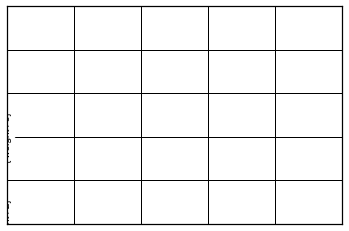

In [43]:
nx.draw_networkx_edge_labels(G, nx.bipartite_layout(G, G.nodes))

# Small Experiment in linear fit

Demonstrating that if X has more features than samples, you will get a perfect fit even on random data. This is clearly a model that can overfit the data

In [22]:
X = np.random.rand(9,15)
y = np.random.rand(9)

model = LinearRegression(fit_intercept=True).fit(X, y)
model.score(X, y)


1.0